In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

suv_data = pd.read_csv('/Users/a0k01jq/Downloads/ML/suv_data.csv')
print(suv_data.shape)
print('# of users in original data : '+str(len(suv_data)))
suv_data.head(10)

(400, 5)
# of users in original data : 400


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


## Analyse Data

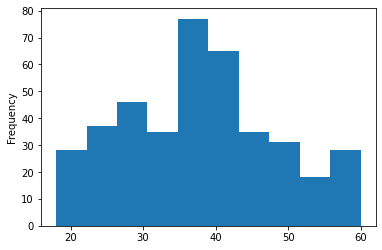

In [4]:
suv_data['Age'].plot.hist()

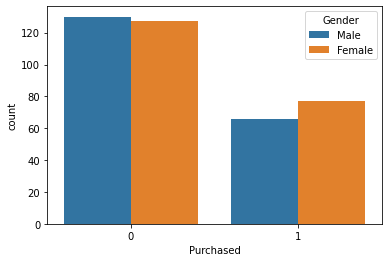

In [6]:
sns.countplot('Purchased',hue='Gender',data=suv_data)

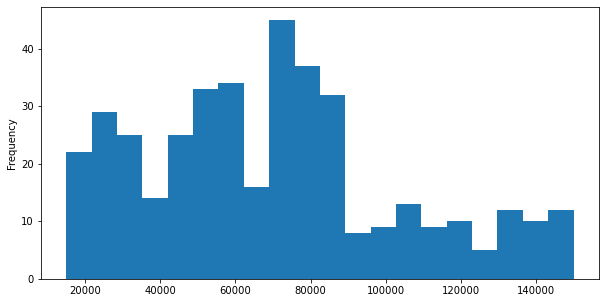

In [7]:
suv_data['EstimatedSalary'].plot.hist(bins=20, figsize=(10,5))

In [8]:
suv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
suv_data.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [11]:
suv_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Data Wrangling

In [14]:
gender=pd.get_dummies(suv_data['Gender'], drop_first=True)

In [15]:
gender.head(5)

,Male
0,1
1,1
2,0
3,0
4,1


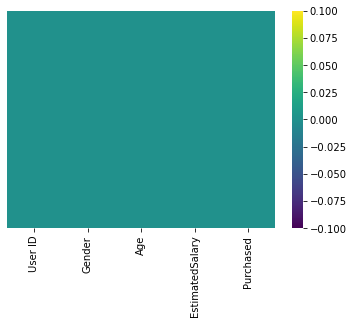

In [16]:
sns.heatmap(suv_data.isnull(), yticklabels=False, cmap='viridis')

In [17]:
suv_data=pd.concat([suv_data,gender], axis=1)

In [18]:
suv_data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [19]:
suv_data.drop(['User ID','Gender'], axis=1, inplace=True)

In [20]:
suv_data.head(5)

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


## Train Data with Iloc

In [122]:
X=suv_data.iloc[:,[0,1,3]].values
y=suv_data.iloc[:,2].values

In [123]:
# Split data in training and testing dataset
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
classifier=LogisticRegression(random_state=0)

In [129]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [130]:
predictions = classifier.predict(X_test)

In [131]:
from sklearn.metrics import accuracy_score

In [145]:
accuracy_score(y_test, predictions)*100

90.0

## Train Data without Iloc

In [133]:
X=suv_data.drop("Purchased",axis=1)
y=suv_data['Purchased']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
logmodel=LogisticRegression(solver='lbfgs', max_iter=500)

In [137]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [138]:
from sklearn.metrics import classification_report

In [139]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.90      0.96      0.93        68\n           1       0.89      0.78      0.83        32\n\n    accuracy                           0.90       100\n   macro avg       0.90      0.87      0.88       100\nweighted avg       0.90      0.90      0.90       100\n'

In [140]:
from sklearn.metrics import confusion_matrix

In [141]:
confusion_matrix(y_test, predictions)

array([[65,  3],
       [ 7, 25]])

In [142]:
from sklearn.metrics import accuracy_score

In [143]:
accuracy_score(y_test, predictions)*100

90.0